In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
!python --version

In [2]:
!ls

conda_env.list		  iml2018		   test_full_Nhardest5.pickle
EDA_and_xgboost.ipynb	  README.md		   train_full_Nhardest5.pickle
Feature_Extraction.ipynb  Test_file_content.ipynb


This is an ugly workaround to allow reading of pickle files in pandas 0.19 (Misha's local version), while the files were produces in pandas 0.21 (on swan)

In [11]:
if int(pd.__version__.split('.')[1]) < 20:
    import sys
    import pandas.indexes 
    sys.modules['pandas.core.indexes'] = pandas.indexes

In [12]:
def loadInputAsDF(fin_name):
    #read original .npy files
    if '.npy' in fin_name:
        train_array = np.load(fin_name, encoding='bytes')
        train_rec_array = train_array.view(np.recarray)
        return pd.DataFrame.from_records(train_rec_array)
    elif '.pickle' in fin_name:
        return pd.read_pickle(fin_name)
    else: 
        print("I do not know how to treat this input file: {}".format(fin_name))

In [13]:
#train_file_name = 'train10000.npy'
train_file_name = 'train_full_Nhardest5.pickle'

Read in the file properly for different file formats

In [14]:
train_df_full = loadInputAsDF(train_file_name)

In [15]:
train_df_full.shape

(1042167, 53)

In [16]:
train_df = train_df_full.sample(n=100000, random_state=314).fillna(-999)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 193093 to 379990
Data columns (total 53 columns):
genjet_sd_m              100000 non-null float32
recojet_pt               100000 non-null float32
recojet_eta              100000 non-null float32
recojet_phi              100000 non-null float32
recojet_m                100000 non-null float32
recojet_sd_pt            100000 non-null float32
recojet_sd_eta           100000 non-null float32
recojet_sd_phi           100000 non-null float32
recojet_sd_m             100000 non-null float32
n_constituents           100000 non-null int32
sum_charge               100000 non-null float64
sum_Eem                  100000 non-null float64
sum_Ehad                 100000 non-null float64
constituents_pt_0        100000 non-null float32
constituents_pt_1        100000 non-null float32
constituents_pt_2        100000 non-null float32
constituents_pt_3        100000 non-null float32
constituents_pt_4        100000 non-null float32
cons

In [18]:
train_df.corr()

,genjet_sd_m,recojet_pt,recojet_eta,recojet_phi,recojet_m,recojet_sd_pt,recojet_sd_eta,recojet_sd_phi,recojet_sd_m,n_constituents,...,constituents_Eem_0,constituents_Eem_1,constituents_Eem_2,constituents_Eem_3,constituents_Eem_4,constituents_Ehad_0,constituents_Ehad_1,constituents_Ehad_2,constituents_Ehad_3,constituents_Ehad_4
genjet_sd_m,1.000000,0.097515,-0.002049,-0.002521,0.856975,0.164751,-0.002072,-0.002555,0.933146,0.618944,...,0.073517,0.035389,-0.051942,-0.084471,-0.092040,0.054865,-0.028106,-0.098739,-0.148337,-0.176340
recojet_pt,0.097515,1.000000,-0.001703,-0.005902,0.277357,0.976782,-0.001727,-0.006000,0.201122,0.040014,...,0.064865,0.072112,0.111699,0.133449,0.082238,0.120895,0.143787,0.165387,0.169297,0.221027
recojet_eta,-0.002049,-0.001703,1.000000,0.003486,-0.000346,-0.001992,0.999984,0.003637,-0.001683,-0.002916,...,-0.008489,0.002560,0.003130,-0.002827,-0.005071,0.001069,-0.003906,-0.005836,0.000453,0.001163
recojet_phi,-0.002521,-0.005902,0.003486,1.000000,-0.003689,-0.004693,0.003513,0.998199,-0.002833,-0.000632,...,-0.002797,-0.002422,-0.001655,-0.004232,0.002138,-0.005438,-0.003485,-0.002885,0.001778,-0.002956
recojet_m,0.856975,0.277357,-0.000346,-0.003689,1.000000,0.293612,-0.000371,-0.003734,0.900522,0.688569,...,0.063064,0.029093,-0.040317,-0.062355,-0.101171,0.045125,-0.023140,-0.079647,-0.127527,-0.138667
recojet_sd_pt,0.164751,0.976782,-0.001992,-0.004693,0.293612,1.000000,-0.002020,-0.004787,0.287694,0.019696,...,0.071164,0.078297,0.119008,0.131478,0.064128,0.123475,0.147890,0.170493,0.176998,0.222764
recojet_sd_eta,-0.002072,-0.001727,0.999984,0.003513,-0.000371,-0.002020,1.000000,0.003663,-0.001712,-0.002894,...,-0.008516,0.002556,0.003133,-0.002851,-0.005049,0.001075,-0.003902,-0.005849,0.000460,0.001136
recojet_sd_phi,-0.002555,-0.006000,0.003637,0.998199,-0.003734,-0.004787,0.003663,1.000000,-0.002865,-0.000436,...,-0.002823,-0.002432,-0.001662,-0.004288,0.002164,-0.005470,-0.003480,-0.002805,0.001918,-0.002900
recojet_sd_m,0.933146,0.201122,-0.001683,-0.002833,0.900522,0.287694,-0.001712,-0.002865,1.000000,0.580972,...,0.073398,0.038391,-0.030625,-0.064457,-0.108704,0.054933,-0.011657,-0.069222,-0.109234,-0.130425
n_constituents,0.618944,0.040014,-0.002916,-0.000632,0.688569,0.019696,-0.002894,-0.000436,0.580972,1.000000,...,0.032560,-0.013432,-0.116273,-0.141531,-0.174728,-0.029120,-0.129616,-0.212513,-0.285476,-0.303081


## EDA

In [ ]:
#for var in ['recojet_pt', 'recojet_eta', 'recojet_phi', 'recojet_m',
#       'recojet_sd_pt', 'recojet_sd_eta', 'recojet_sd_phi', 'recojet_sd_m',
#       'n_constituents']:
#    print(var)
#    sns.jointplot(x='genjet_sd_m', y=var, data=train_df, kind='hex')

### Feature engineering and drop some columns

In [19]:
train_df.columns

Index(['genjet_sd_m', 'recojet_pt', 'recojet_eta', 'recojet_phi', 'recojet_m',
       'recojet_sd_pt', 'recojet_sd_eta', 'recojet_sd_phi', 'recojet_sd_m',
       'n_constituents', 'sum_charge', 'sum_Eem', 'sum_Ehad',
       'constituents_pt_0', 'constituents_pt_1', 'constituents_pt_2',
       'constituents_pt_3', 'constituents_pt_4', 'constituents_eta_0',
       'constituents_eta_1', 'constituents_eta_2', 'constituents_eta_3',
       'constituents_eta_4', 'constituents_phi_0', 'constituents_phi_1',
       'constituents_phi_2', 'constituents_phi_3', 'constituents_phi_4',
       'constituents_charge_0', 'constituents_charge_1',
       'constituents_charge_2', 'constituents_charge_3',
       'constituents_charge_4', 'constituents_dxy_0', 'constituents_dxy_1',
       'constituents_dxy_2', 'constituents_dxy_3', 'constituents_dxy_4',
       'constituents_dz_0', 'constituents_dz_1', 'constituents_dz_2',
       'constituents_dz_3', 'constituents_dz_4', 'constituents_Eem_0',
       'constituent

In [20]:
columns_to_drop = []
columns_arrays = ['constituents_pt', 'constituents_eta',
       'constituents_phi', 'constituents_charge', 'constituents_dxy',
       'constituents_dz', 'constituents_Eem', 'constituents_Ehad']
columns_insignificant = ['recojet_eta', 'recojet_phi', 
       'recojet_sd_eta', 'recojet_sd_phi']
columns_insignificant_const = ['constituents_eta_0',
       'constituents_eta_1', 'constituents_eta_2', 'constituents_eta_3',
       'constituents_eta_4', 'constituents_phi_0', 'constituents_phi_1',
       'constituents_phi_2', 'constituents_phi_3', 'constituents_phi_4',
       'constituents_charge_0', 'constituents_charge_1',
       'constituents_charge_2', 'constituents_charge_3',
       'constituents_charge_4']

In [21]:
#columns_to_drop.extend(columns_arrays)
columns_to_drop.extend(columns_insignificant)
columns_to_drop.extend(columns_insignificant_const)

In [22]:
#To be done only if those array columns have not been droped yet
train_df.drop(columns_to_drop, axis=1, inplace=True)

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 193093 to 379990
Data columns (total 34 columns):
genjet_sd_m            100000 non-null float32
recojet_pt             100000 non-null float32
recojet_m              100000 non-null float32
recojet_sd_pt          100000 non-null float32
recojet_sd_m           100000 non-null float32
n_constituents         100000 non-null int32
sum_charge             100000 non-null float64
sum_Eem                100000 non-null float64
sum_Ehad               100000 non-null float64
constituents_pt_0      100000 non-null float32
constituents_pt_1      100000 non-null float32
constituents_pt_2      100000 non-null float32
constituents_pt_3      100000 non-null float32
constituents_pt_4      100000 non-null float32
constituents_dxy_0     100000 non-null float32
constituents_dxy_1     100000 non-null float32
constituents_dxy_2     100000 non-null float32
constituents_dxy_3     100000 non-null float32
constituents_dxy_4     100000 non-null f

### Split and normalise

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('genjet_sd_m', axis=1), train_df['genjet_sd_m'] , test_size=0.30, random_state=314)

/cvmfs/sft.cern.ch/lcg/views/LCG_93python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


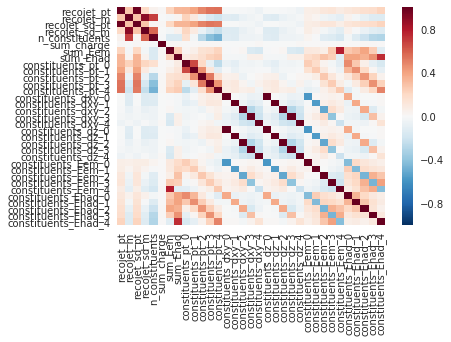

In [65]:
sns.heatmap(X_train.corr())

In [66]:
from sklearn.decomposition import PCA
pca_trans = PCA()
pca_trans.fit(X_train)
X_train_pca = pca_trans.transform(X_train)
X_test_pca = pca_trans.transform(X_test)

/cvmfs/sft.cern.ch/lcg/views/LCG_93python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


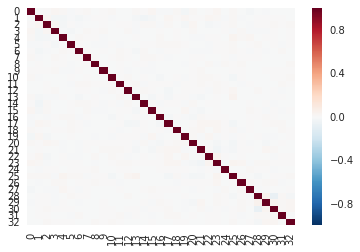

In [69]:
sns.heatmap(pd.DataFrame(X_test_pca).corr())

# XGBoost regressor

### Convert to xgboost input structure

In [26]:
import xgboost as xgb

In [ ]:
# construct xgboost.DMatrix from numpy array, treat -999.0 as missing value
xgbmat_train = xgb.DMatrix( data=X_train, label=y_train, missing = np.nan )

In [ ]:
isinstance(xgbmat_train , xgb.DMatrix)

## Build the XGBoost model

In [27]:
def evaluate_loss(predictions, truth):  
    #truth is xgb.DMatrix in fact, thust .get_label to get the y column
    if isinstance(truth , xgb.DMatrix):
        t = truth.get_label()
    else:
        t = truth
    ratio = predictions / t
    a = np.nanpercentile(ratio, 84, interpolation='nearest')  
    b = np.nanpercentile(ratio, 16, interpolation='nearest')  
    c = np.nanpercentile(ratio, 50, interpolation='nearest')  
    loss = (a-b)/(2.*c)  
    return loss

In [28]:
def evaluate_loss_xgb(predictions, truth):  
    loss = evaluate_loss(predictions, truth)
    return ('xxx', loss)  

In [37]:
#preliminary parameters. will be fine-tuned in the GridSearch
xgb_params = {'max_depth': 5, 'learning_rate':0.1, 'n_estimators':100,
              'silent':1, 'random_state': 314, 'seed': 314, 'n_job':4}

In [30]:
clf = xgb.XGBRegressor(**xgb_params)

## Do a comparison of feature importance and extract the optimal number of trees

In [31]:
#an adjusted function from this post: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
def modelfit(alg, X_train, y_train, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
        print("Decided on {} trees".format(cvresult.shape[0]))

    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train, eval_metric=evaluate_loss_xgb)
        
    #Predict training set:
    pred = alg.predict(X_train)
        
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % sqrt(mean_squared_error(y_train, pred)))
    print("Custom loss : %.4g" % evaluate_loss(y_train, pred))
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

[0]	train-rmse:297.636+0.370088	test-rmse:297.693+1.60218
[1]	train-rmse:270.483+0.300875	test-rmse:270.645+1.47815
[2]	train-rmse:246.257+0.253887	test-rmse:246.535+1.38338
[3]	train-rmse:224.68+0.225457	test-rmse:225.113+1.28632
[4]	train-rmse:205.492+0.230759	test-rmse:206.013+1.14326
[5]	train-rmse:188.49+0.265036	test-rmse:189.107+1.05442
[6]	train-rmse:173.441+0.295991	test-rmse:174.188+1.01517
[7]	train-rmse:160.159+0.331281	test-rmse:161.09+1.00318
[8]	train-rmse:148.489+0.386835	test-rmse:149.611+1.04347
[9]	train-rmse:138.282+0.441062	test-rmse:139.581+1.16905
[10]	train-rmse:129.385+0.501929	test-rmse:130.851+1.27763
[11]	train-rmse:121.653+0.559794	test-rmse:123.31+1.4255
[12]	train-rmse:114.959+0.608198	test-rmse:116.802+1.59482
[13]	train-rmse:109.2+0.64898	test-rmse:111.25+1.77883
[14]	train-rmse:104.272+0.681723	test-rmse:106.499+1.94358
[15]	train-rmse:100.053+0.719921	test-rmse:102.511+2.13904
[16]	train-rmse:96.4621+0.743882	test-rmse:99.1401+2.31302
[17]	train-rmse:

/cvmfs/sft.cern.ch/lcg/views/LCG_93python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


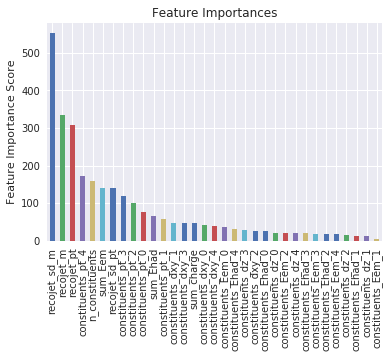

In [32]:
modelfit(clf, X_train, y_train, early_stopping_rounds=10)

## GridSearch to determine the optimal parameters

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.metrics import make_scorer

The next cell is CPU intense! do not try it on the full dataset!!!!!

In [ ]:
param_test1 = {'max_depth': [3,5,7],
               'min_child_weight': [1,3],
               'gamma': [0,1e-3,1e-1],
               'subsample': [0.6,0.8,1],
               'colsample_bytree':[0.6,0.8,1],
               'reg_alpha':[0, 1e-3, 1e-1],
               'reg_lambda':[1, 1e-1, 1e-3]}
gs1 = GridSearchCV(estimator=clf, param_grid=param_test1, 
                   scoring=make_scorer(evaluate_loss, greater_is_better=False),
                   n_jobs=4, cv=5)
gs1.fit(X_train, y_train)
print(gs1.best_params_)
print(gs1.best_score_)
print(gs1.grid_scores_)

In [ ]:
gs1.cv_results_

In [36]:
cv_results=[]

In [40]:
param_test_list = [{'max_depth': [3,5,7],
               'min_child_weight': [1,3]},
               {'gamma': [0,1e-3,1e-1]},
               {'subsample': [0.6,0.8,1],
               'colsample_bytree':[0.6,0.8,1]},
               {'reg_alpha':[0, 1e-3, 1e-1],
               'reg_lambda':[1, 1e-1, 1e-3]}]
for param_test in param_test_list:
    gs1 = GridSearchCV(estimator=clf, param_grid=param_test, 
                       scoring=make_scorer(evaluate_loss, greater_is_better=False),
                       n_jobs=4, cv=5,
                       verbose=True)
    gs1.fit(X_train, y_train)
    print(gs1.best_params_)
    print(gs1.best_score_)
    cv_results.append(gs1.cv_results_)
    #print(gs1.cv_results_)
    clf.set_params(**(gs1.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  2.0min finished


{'max_depth': 7, 'min_child_weight': 3}
-0.619372764624
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  1.5min finished


{'gamma': 0}
-0.619372764624
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:  3.3min finished


{'colsample_bytree': 0.8, 'subsample': 1}
-0.61724036469
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:  3.9min finished


{'reg_alpha': 0.001, 'reg_lambda': 1}
-0.617240353591


## Save the optimised clf object

In [82]:
import joblib
joblib.dump(gs1, "gs1_2it.joblib.dat")

['gs1_2it.joblib.dat']

In [63]:
xgb_opt_ref1 = gs1.best_estimator_.get_params()
xgb_opt_ref1

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 3,
 'missing': None,
 'n_estimators': 100,
 'n_job': 4,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 314,
 'reg_alpha': 0.001,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 314,
 'silent': 1,
 'subsample': 1}

## Second iteration of GS

In [64]:
param_test_list = [{'max_depth': [7, 9, 11],
               'min_child_weight': [1,3]},
               {'gamma': [0,1e-3,1e-1]},
               {'reg_alpha':[0, 1e-5],
               'reg_lambda':[1, 0.5,2]}]
clf.set_params(**xgb_opt_ref1)
for param_test in param_test_list:
    gs1 = GridSearchCV(estimator=clf, param_grid=param_test, 
                       scoring=make_scorer(evaluate_loss, greater_is_better=False),
                       n_jobs=4, cv=3,
                       verbose=True)
    gs1.fit(X_train, y_train)
    print(gs1.best_params_)
    print(gs1.best_score_)
    clf.set_params(**(gs1.best_params_))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:  1.9min finished


{'max_depth': 11, 'min_child_weight': 1}
-0.612176829331
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:  1.3min finished


{'gamma': 0.001}
-0.612176787221
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:  2.1min finished


{'reg_alpha': 1e-05, 'reg_lambda': 1}
-0.613330496637


## Run XGBoost with the chosen optimal parameters

In [71]:
#preliminary parameters. will be fine-tuned in the GridSearch
xgb_opt = gs1.best_estimator_.get_params()
xgb_opt['learning_rate'] *=0.5
xgb_opt['n_estimators'] *=2
xgb_opt

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0.001,
 'learning_rate': 0.05,
 'max_delta_step': 0,
 'max_depth': 11,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'n_job': 4,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 314,
 'reg_alpha': 1e-05,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 314,
 'silent': 1,
 'subsample': 1}

In [72]:
clf.set_params(**xgb_opt)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.001, learning_rate=0.05,
       max_delta_step=0, max_depth=11, min_child_weight=1, missing=None,
       n_estimators=200, n_job=4, n_jobs=1, nthread=None,
       objective='reg:linear', random_state=314, reg_alpha=1e-05,
       reg_lambda=1, scale_pos_weight=1, seed=314, silent=1, subsample=1)

In [73]:
clf.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric=evaluate_loss_xgb,
        verbose=False)

/cvmfs/sft.cern.ch/lcg/views/LCG_93python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.001, learning_rate=0.05,
       max_delta_step=0, max_depth=11, min_child_weight=1, missing=None,
       n_estimators=200, n_job=4, n_jobs=1, nthread=None,
       objective='reg:linear', random_state=314, reg_alpha=1e-05,
       reg_lambda=1, scale_pos_weight=1, seed=314, silent=1, subsample=1)

In [74]:
evals_result = clf.evals_result()

/cvmfs/sft.cern.ch/lcg/views/LCG_93python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


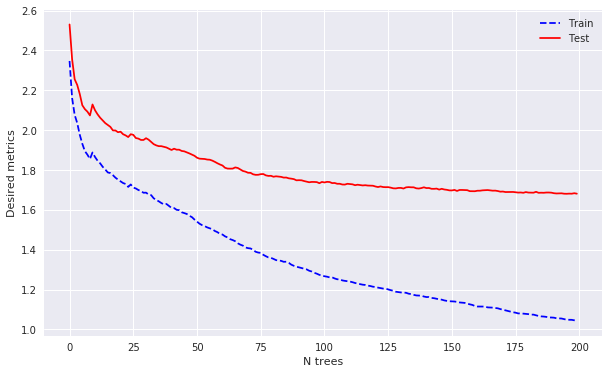

In [75]:
plt.figure(figsize=(10,6))
plt.plot(range(clf.get_params()['n_estimators']), 
         evals_result['validation_0']['xxx'],
         'b--', label='Train')
plt.plot(range(clf.get_params()['n_estimators']), 
         evals_result['validation_1']['xxx'],
         'r-', label='Test')
plt.xlabel('N trees')
plt.ylabel('Desired metrics')
plt.legend()

In [77]:
clf.set_params(**xgb_opt)
clf.fit(X_train_pca, y_train, 
        eval_set=[(X_train_pca, y_train), (X_test_pca, y_test)],
        eval_metric=evaluate_loss_xgb,
        verbose=False)
evals_result = clf.evals_result()

/cvmfs/sft.cern.ch/lcg/views/LCG_93python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide


Text(0.5,1,'PCA transform of inputs')

/cvmfs/sft.cern.ch/lcg/views/LCG_93python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


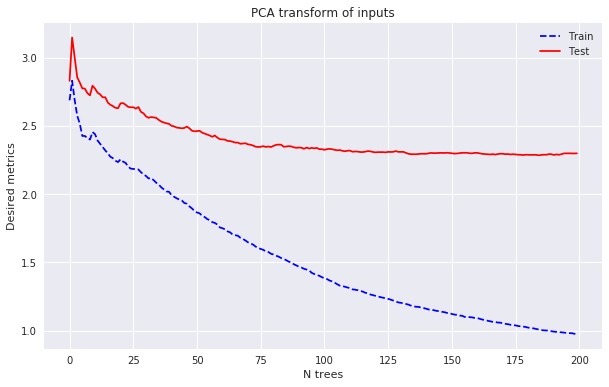

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(clf.get_params()['n_estimators']), 
         evals_result['validation_0']['xxx'],
         'b--', label='Train')
plt.plot(range(clf.get_params()['n_estimators']), 
         evals_result['validation_1']['xxx'],
         'r-', label='Test')
plt.xlabel('N trees')
plt.ylabel('Desired metrics')
plt.legend()
plt.title('PCA transform of inputs')

In [80]:
clf_def = xgb.XGBRegressor(**xgb_params)

clf_def.fit(X_train_pca, y_train, 
        eval_set=[(X_train_pca, y_train), (X_test_pca, y_test)],
        eval_metric=evaluate_loss_xgb,
        verbose=False)
evals_result_def = clf_def.evals_result()

/cvmfs/sft.cern.ch/lcg/views/LCG_93python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide


Text(0.5,1,'PCA transform of inputs DEFAULT XGBoost')

/cvmfs/sft.cern.ch/lcg/views/LCG_93python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


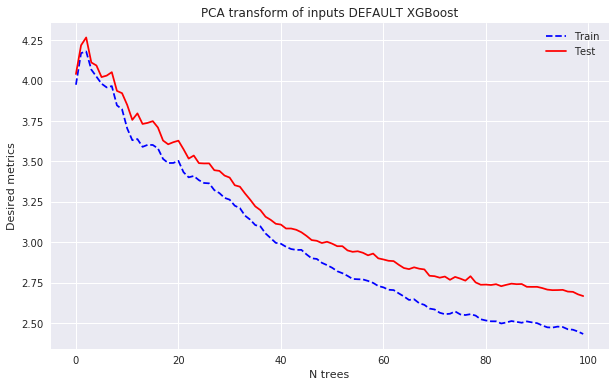

In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(clf_def.get_params()['n_estimators']), 
         evals_result_def['validation_0']['xxx'],
         'b--', label='Train')
plt.plot(range(clf_def.get_params()['n_estimators']), 
         evals_result_def['validation_1']['xxx'],
         'r-', label='Test')
plt.xlabel('N trees')
plt.ylabel('Desired metrics')
plt.legend()
plt.title('PCA transform of inputs DEFAULT XGBoost')

## PCA train

In [84]:
param_test_list = [{'max_depth': [5, 7, 9, 11]},
               {'min_child_weight': [1,3]},
               {'gamma': [0,1e-3,1e-1]},
               {'reg_alpha':[0, 1e-5],
               'reg_lambda':[1]}]
clf.set_params(**xgb_opt_ref1)
for param_test in param_test_list:
    gs2 = GridSearchCV(estimator=clf, param_grid=param_test, 
                       scoring=make_scorer(evaluate_loss, greater_is_better=False),
                       n_jobs=4, cv=3,
                       verbose=True)
    gs2.fit(X_train_pca, y_train)
    print(gs2.best_params_)
    print(gs2.best_score_)
    clf.set_params(**(gs2.best_params_))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  1.5min finished


{'max_depth': 11}
-0.723860068856
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  1.2min finished


{'min_child_weight': 1}
-0.719776034285
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:  1.8min finished


{'gamma': 0.1}
-0.71721442049
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  1.1min finished


{'reg_alpha': 0, 'reg_lambda': 1}
-0.717643343791


In [ ]:
import joblib
joblib.dump(gs2, "gs2.joblib.dat")

In [85]:
clf_pca_hyp = xgb.XGBRegressor(**gs2.best_estimator_.get_params())

clf_pca_hyp.fit(X_train_pca, y_train, 
        eval_set=[(X_train_pca, y_train), (X_test_pca, y_test)],
        eval_metric=evaluate_loss_xgb,
        verbose=False)
evals_result_pca_hyp = clf_pca_hyp.evals_result()

/cvmfs/sft.cern.ch/lcg/views/LCG_93python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide


NameError: name 'lf_pca_hyp' is not defined

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(clf_pca_hyp.get_params()['n_estimators']), 
         evals_result_pca_hyp['validation_0']['xxx'],
         'b--', label='Train')
plt.plot(range(clf_pca_hyp.get_params()['n_estimators']), 
         evals_result_pca_hyp['validation_1']['xxx'],
         'r-', label='Test')
plt.xlabel('N trees')
plt.ylabel('Desired metrics')
plt.legend()
plt.title('PCA transform of inputs HYP-optimised XGBoost')

## A dummy check

In [62]:
evaluate_loss(X_test['recojet_sd_m'], y_test)

5.661026688971635